# Save full status data to json file

In [24]:
#install packages if needed
# import sys
# !{sys.executable} -m pip install networkx

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tweepy
import json 
import datetime
import time
import seaborn as sns
import wordcloud

In [ ]:
# Creating the authentication object
auth = tweepy.OAuthHandler(auth_ap.consumer_key, auth_ap.consumer_secret)
# Setting your access token and secret
auth.set_access_token(auth_ap.access_token, auth_ap.access_token_secret)
# Creating the API object while passing in auth information
api = tweepy.API(auth) 

In [2]:
class TweetMiner(object):
    import auth_ap
    # number of tweets per one pull; there is limit on this
    result_limit    =   20    
    data            =   []
    api             =   False
    
    twitter_keys = {
        'consumer_key':        auth_ap.consumer_key,
        'consumer_secret':     auth_ap.consumer_secret,
        'access_token_key':    auth_ap.access_token,
        'access_token_secret': auth_ap.access_token_secret
    }
    
    
    def __init__(self, keys_dict=twitter_keys, api=api, result_limit = 100):
        
        self.twitter_keys = keys_dict
        
        auth = tweepy.OAuthHandler(keys_dict['consumer_key'], keys_dict['consumer_secret'])
        auth.set_access_token(keys_dict['access_token_key'], keys_dict['access_token_secret'])
        
        self.api = tweepy.API(auth)
        self.twitter_keys = keys_dict
        
        self.result_limit = result_limit

    def mine_tweets_user(self, user="", last_tweet_id  =  False, max_pages=17):
        # keep track of last tweet id
        # multiply by the # of result_limit = total tweets
        data_page = []
        page =  1
        
        while page <= max_pages:
            if last_tweet_id:
                statuses   =   self.api.user_timeline(screen_name = user,
                                                     count = self.result_limit,
                                                     # get tweets older than last retrieved ones  
                                                     max_id = last_tweet_id - 1,
                                                     tweet_mode = 'extended',
                                                    )        
            else:
                statuses   =   self.api.user_timeline(screen_name=user,
                                                        count = self.result_limit,
                                                        tweet_mode = 'extended',
                                                        )
            for st in statuses:
                data_page.append(st._json)
                last_tweet_id = st.id

            page += 1
        # returns list of dict
        return data_page, last_tweet_id
    
    def mine_tweets_keyword(self, query = "", language = 'en', last_tweet_id  =  False,
                         max_pages=17):

        data_page = []
        page = 1
        
        while page <= max_pages:
            if last_tweet_id:
                statuses   =   self.api.search(q = query, lang = language,
                                                     count = self.result_limit,
                                                     # get tweets older than last retrieved ones  
                                                     max_id = last_tweet_id - 1,
                                                     tweet_mode = 'extended',
                                                    )        
            else:
                statuses   =   self.api.search(q = query, lang = language,
                                                        count = self.result_limit,
                                                        tweet_mode = 'extended',
                                                 )
    
            for st in statuses:
                data_page.append(st._json)
                last_tweet_id = st.id
            page += 1
        # returns list of dict
        return data_page, last_tweet_id

## Mine tweets by query

In [303]:
miner = TweetMiner(result_limit = 100)
counter = 1
ls_master = []
q_word = 'AR/VR -game -#nausicaa'
last_id = False
while counter < 15:
    print (counter)
    try:
        
        ls_tweets, last_tweet_id = miner.mine_tweets_keyword(query=q_word, language = 'en', 
                                       last_tweet_id = last_id, max_pages = 34)
        last_id = last_tweet_id
        ls_master.extend(ls_tweets)
    except:
        print ("Limit is reached")
        time.sleep(16*60) #15 minute sleep time
        
    if len(ls_tweets) < 1:
        break
        
    counter+=1

1
2
3
4
5


In [304]:
ls_master[-1]

{'created_at': 'Thu Sep 10 12:44:41 +0000 2020',
 'id': 1304038084934275078,
 'id_str': '1304038084934275078',
 'full_text': 'RT @AremDzemal: 3+ billion #SocialMedia users around the world by 2021. @eMarketer via @MikeQuindazzi #INFOGRAPHICS #FinTech #IoT #IIoT #ma…',
 'truncated': False,
 'display_text_range': [0, 140],
 'entities': {'hashtags': [{'text': 'SocialMedia', 'indices': [27, 39]},
   {'text': 'INFOGRAPHICS', 'indices': [102, 115]},
   {'text': 'FinTech', 'indices': [116, 124]},
   {'text': 'IoT', 'indices': [125, 129]},
   {'text': 'IIoT', 'indices': [130, 135]}],
  'symbols': [],
  'user_mentions': [{'screen_name': 'AremDzemal',
    'name': 'Dzemal Arem',
    'id': 1097258235680227329,
    'id_str': '1097258235680227329',
    'indices': [3, 14]},
   {'screen_name': 'eMarketer',
    'name': 'eMarketer',
    'id': 21217761,
    'id_str': '21217761',
    'indices': [72, 82]},
   {'screen_name': 'MikeQuindazzi',
    'name': 'Mike Quindazzi ✨',
    'id': 2344530218,
    'id_str

In [305]:
fname = 'vr_ar_-game_-nausicaa{}.json'.format(datetime.datetime.now().strftime("%Y-%m-%d-%H-%M-%S"))
with open(fname, 'w', encoding='utf8') as file:
    json.dump(ls_master, file)

In [8]:
path = r"U:\Data_Analysis\pak6\DS project\vr_ar_-game_-nausicaa2020-09-18-23-26-27.json"
df_3 = pd.read_json(path)
df_3.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,None,2020-09-19 03:18:04,"[0, 54]","{'hashtags': [{'text': 'enterprise', 'indices'...",NaN,0,False,RT @saragray22: How VR Will Impact the #enterp...,None,...,NaN,NaN,NaN,NaN,0,False,NaN,"<a href=""http://www.adamboyne.co.uk"" rel=""nofo...",False,"{'id': 4141683916, 'id_str': '4141683916', 'na..."
1,NaN,None,2020-09-19 03:15:40,"[0, 168]","{'hashtags': [{'text': 'Neurosurgery', 'indice...",NaN,0,False,"The Future of Surgery. Telemedicine, Robots, A...",None,...,0.0,NaN,NaN,NaN,0,False,NaN,"<a href=""http://twitter.com/#!/download/ipad"" ...",False,"{'id': 913191520257363968, 'id_str': '91319152..."
2,NaN,None,2020-09-19 03:12:48,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,RT @VRARASummit: In addition to group networki...,None,...,NaN,NaN,NaN,NaN,8,False,{'created_at': 'Fri Sep 11 16:16:00 +0000 2020...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 869634240937435137, 'id_str': '86963424..."
3,NaN,None,2020-09-19 03:11:30,"[0, 144]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,RT @thevrara: Don't miss this World Bank VR Pa...,None,...,0.0,NaN,NaN,NaN,3,False,{'created_at': 'Wed Sep 16 14:25:42 +0000 2020...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 553059632, 'id_str': '553059632', 'name..."
4,NaN,None,2020-09-19 03:10:14,"[0, 140]","{'hashtags': [{'text': 'AI', 'indices': [37, 4...",NaN,0,False,RT @Bomoimajid: ⭕ Global Spending On #AI Syste...,None,...,NaN,NaN,NaN,NaN,21,False,{'created_at': 'Fri Jul 17 16:12:19 +0000 2020...,,False,"{'id': 1279038928239108099, 'id_str': '1279038..."


In [9]:
df_master = pd.concat([df_1, df_2, df_3])

In [11]:
df_master.to_pickle("ar-vr_tweets_old.pkl")

## Text processing

In [5]:
path = r"U:\Data_Analysis\pak6\DS project\ar-vr_tweets.pkl"
df_master = pd.read_pickle(path)
df_master.head()

RecursionError: maximum recursion depth exceeded

In [12]:
from nltk.tokenize import word_tokenize
import re
import operator 
from collections import Counter
from nltk.corpus import stopwords
import string

In [29]:
emoticons_str = r"""
    (?:
        [:=;] # Eyes
        [oO\-]? # Nose (optional)
        [D\)\]\(\]/\\OpP] # Mouth
    )"""
 
regex_str = [
    emoticons_str,
    r'<[^>]+>', # HTML tags
    r'(?:@[\w_]+)', # @-mentions
    r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)", # hash-tags
    r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f][.]))+', # URLs
    r'(?:(?:\d+,?)+(?:\.?\d+)?)', # numbers
    r"(?:[a-z][a-z'\-_]+[a-z])", # words with - and '
    r'(?:[\w_]+)', # other words
    r'(?:\S)' # anything else
]
    
tokens_re = re.compile(r'('+'|'.join(regex_str)+')', re.VERBOSE | re.IGNORECASE)
emoticon_re = re.compile(r'^'+emoticons_str+'$', re.VERBOSE | re.IGNORECASE)
 
def tokenize(s):
    return tokens_re.findall(s)
 
def preprocess(s, lowercase=True):
    tokens = tokenize(s)
    if lowercase:
        tokens = [token if emoticon_re.search(token) else token.lower() for token in tokens]
    return tokens

In [14]:
def get_status_text(df_row):
    #retweet
    if isinstance(df_row.retweeted_status, dict):
        text = df_row.retweeted_status['full_text']
    #quote
    elif df_row.quoted_status_id > 0:
        text = df_row.quoted_status["full_text"]
    # regular tweet
    else:
        text = df_row['full_text']
    return text

### Term frequency

In [15]:
df_tweets = df_master.reset_index(drop=True)

In [16]:
punctuation = list(string.punctuation)
stop = stopwords.words('english') + punctuation + ["amp", "reality", "#machinelearning", "#technology",
                "#virtualreality", "#augmentedreality", "reality", "#iiot", "#artificialintelligence",
                 'virtual', 'augmented' ]


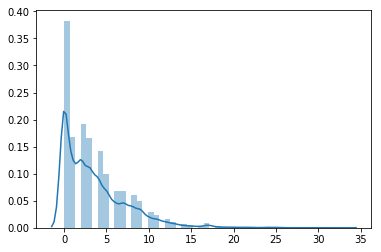

In [17]:
sns.distplot(df_tweets.entities.apply(lambda x: len(x['hashtags'])).values)

In [18]:
count_terms = Counter()
count_hash = Counter()

for idx in df_tweets.index[:]:
    text = get_status_text(df_tweets.iloc[idx])
    if len(df_tweets.iloc[idx].entities['hashtags']) > 5:
        continue
    terms_hash = [term for term in preprocess(text) 
              if term not in stop and len(term) > 3 and term.startswith('#')]
    terms_only = [term for term in preprocess(text) 
              if term not in stop and len(term) > 3 and
              not term.startswith(('#', '@'))] 

    # Update the counter
    count_hash.update(terms_hash)
    count_terms.update(terms_only)

print(count_hash.most_common(10))
print(count_terms.most_common(10))

[('#iot', 2550), ('#stpiindia', 1142), ('#innovation', 1041), ('#bigdata', 1020), ('#blockchain', 1008), ('#stpicoes', 999), ('#stpiincubation', 998), ('#oculus', 966), ('#stpioctane', 966), ('#growwithstpi', 966)]
[('join', 2160), ('like', 1593), ('facebook', 1581), ('future', 1411), ('live', 1290), ('oculus', 1238), ('build', 1234), ('next', 1195), ('check', 1149), ('work', 1068)]


### Wordclouds

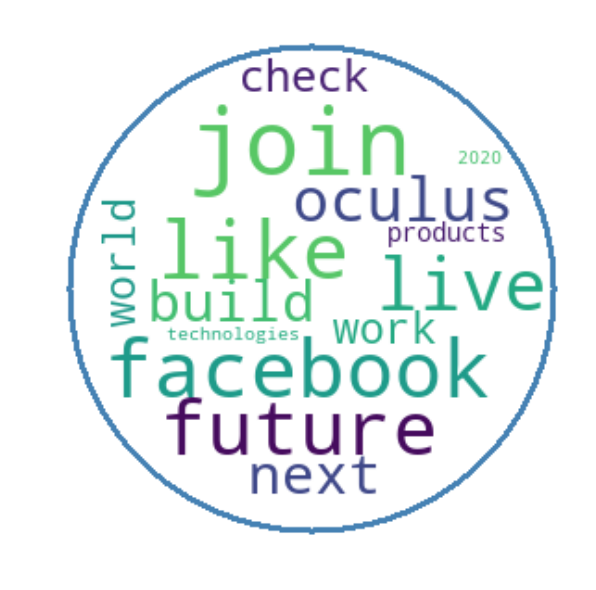

In [21]:
x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

_input = count_terms
wc = WordCloud( mask = mask, contour_width=3, contour_color= 'steelblue',
                background_color ='white', max_font_size=50, 
                max_words=200, random_state=42, 
                min_font_size = 10).generate_from_frequencies(_input) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wc, interpolation='bilinear') 
plt.axis("off") 
plt.tight_layout(pad = 0) 

In [23]:
from PIL import Image
from wordcloud import WordCloud
path_image = r"U:\Data_Analysis\pak6\DS project\Huawei-VR-Glass.jpg"
mask = np.array(Image.open(path_image))

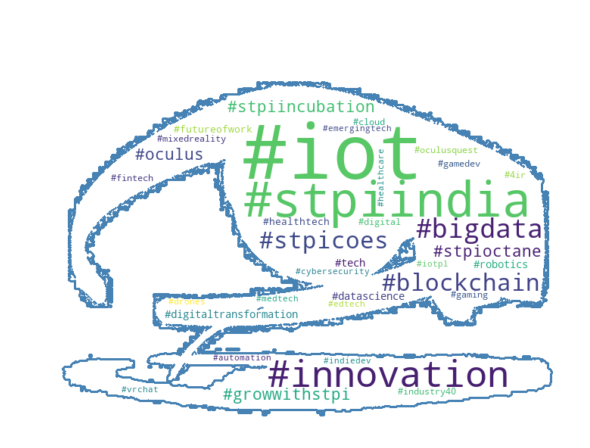

In [24]:
_input = count_hash
wc = WordCloud( mask = mask, contour_width=3, contour_color= 'steelblue',
                background_color ='white', max_font_size=100, 
                max_words=200, random_state=42, 
                min_font_size = 10).generate_from_frequencies(_input) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wc, interpolation='bilinear') 
plt.axis("off") 
plt.tight_layout(pad = 0) 

### Word co-occurences

In [30]:
from nltk import bigrams 
count_terms_bigrams = Counter()

for idx in df_tweets.index:
    
    text = get_status_text(df_tweets.iloc[idx])
        
    terms_only = [term for term in preprocess(text) 
              if term not in stop and len(term) > 4 and
              not term.startswith(('#', '@'))] 

    terms_bigram = bigrams(terms_only)
    # Update the counter
    count_terms_bigrams.update(terms_bigram)
    # Print the first 5 most frequent words
print (count_terms_bigrams.most_common(10))

[(('products', 'https://t.co/p43xjldenm.'), 634), (('supply', 'chain'), 594), (('oculus', 'quest'), 583), (('facebook', 'connect'), 423), (('build', 'products'), 410), (('truck', 'drivers'), 402), (('drivers', 'remotely'), 336), (('build', 'https://t.co/p43xjldenm.'), 336), (('disruptive', 'technologies'), 237), (('technologies', 'infographic'), 224)]


In [31]:
from collections import defaultdict
# remember to include the other import from the previous post
 
com = defaultdict(lambda : defaultdict(int))
for idx in df_tweets.index:
    
    text = get_status_text(df_tweets.iloc[idx])
        
    terms_only = [term for term in preprocess(text) 
              if term not in stop and len(term) > 2 and
              not term.startswith(('#', '@'))] 

    # Build co-occurrence matrix
    for i in range(len(terms_only)-1):            
        for j in range(i+1, len(terms_only)):
            w1, w2 = sorted([terms_only[i], terms_only[j]])                
            if w1 != w2:
                com[w1][w2] += 1

In [32]:
com_max = []
# For each term, look for the most common co-occurrent terms
for t1 in com:
    t1_max_terms = sorted(com[t1].items(), key=operator.itemgetter(1), reverse=True)[:5]
    for t2, t2_count in t1_max_terms:
        com_max.append(((t1, t2), t2_count))
# Get the most frequent co-occurrences
terms_max = sorted(com_max, key=operator.itemgetter(1), reverse=True)
print(terms_max[:5])

[(('build', 'join'), 1045), (('build', 'https://t.co/p43xjldenm.'), 1025), (('build', 'products'), 996), (('https://t.co/p43xjldenm.', 'join'), 973), (('join', 'products'), 881)]


#### Term frequency over time

In [33]:
from matplotlib.dates import DateFormatter

In [42]:
htag_dict = {}
target_ls = ['#vr', '#iot', "#blockchain", "#oculus"]
for trg in target_ls:
    htag_dict[trg] = []

# f is the file pointer to the JSON data set
for idx in df_tweets.index:
    
    text = get_status_text(df_tweets.iloc[idx])
    # Create a list with all the terms
    terms_hash = [term for term in preprocess(text) 
              if term not in stop and len(term) > 2 and term.startswith('#')]
    
    # track when the hashtag is mentioned
    for trg in target_ls: 
        if trg in terms_hash:
            htag_dict[trg].append(df_tweets.iloc[idx]['created_at'])
 

In [43]:
ls = []
for key in htag_dict.keys():
    tmp = htag_dict[key]
    ones = [1]*len(tmp)
    idx = pd.DatetimeIndex(tmp)
    tmp = pd.Series(ones, index=idx)
    tmp = tmp.resample('3H').sum().fillna(0).reset_index()
    tmp.columns = ['date', 'freq']
    tmp.loc[:, 'target'] = key
    ls.append(tmp)
df_target_tc = pd.concat(ls)

In [44]:
from matplotlib.dates import DateFormatter

(array([737673., 737677., 737681., 737685., 737689., 737693.]),
 <a list of 6 Text xticklabel objects>)

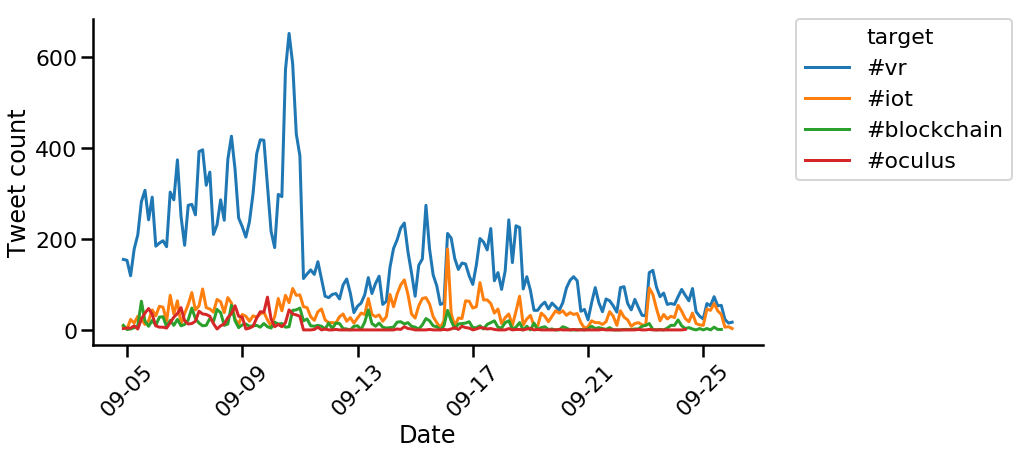

In [45]:
sns.set_context('poster')
f, ax = plt.subplots(figsize =(12, 6))
ax = sns.lineplot(data = df_target_tc, x = 'date', y = 'freq', hue = 'target')
sns.despine()

date_form = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)
ax.set_xlabel('Date')
ax.set_ylabel('Tweet count')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation = 45)

## Sentiment analysis

Medium article with different pre trained models  
https://medium.com/@b.terryjack/nlp-pre-trained-sentiment-analysis-1eb52a9d742c  

In [46]:
# nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sian = SentimentIntensityAnalyzer()
from textblob import TextBlob


In [47]:
def dict_to_list(dict1):
    dictlist = list()
    for key, value in dict1.items():
        temp = [key,value]
        dictlist.append(temp)
    return dictlist

In [48]:
df_tweets.columns

Index(['contributors', 'coordinates', 'created_at', 'display_text_range',
       'entities', 'extended_entities', 'favorite_count', 'favorited',
       'full_text', 'geo', 'id', 'id_str', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status',
       'lang', 'metadata', 'place', 'possibly_sensitive', 'quoted_status',
       'quoted_status_id', 'quoted_status_id_str', 'retweet_count',
       'retweeted', 'retweeted_status', 'source', 'truncated', 'user'],
      dtype='object')

In [50]:
d_vader = {}
d_tblob = {}
ls_tmp_df = []
for idx in df_tweets[df_tweets.entities.apply(lambda x: len(x['hashtags'])) < 5].index:
    text = get_status_text(df_tweets.iloc[idx]) 
    tweet_id = df_tweets.iloc[idx].id
    compound = sian.polarity_scores(text)['compound']
    tblob = TextBlob(text).sentiment[0]
#     dict_res = dict_to_list(sian.polarity_scores(text))
#     nltk.sentiment.util.demo_vader_instance(_)
#     tweet_sentim.append([text, dict_res[0][1], dict_res[1][1], dict_res[2][1], dict_res[3][1]])
    tmp_df = pd.DataFrame({'tweet_text': text, 'id': tweet_id, "nltk": compound, 'tblob': tblob }, index = [0])
    ls_tmp_df.append(tmp_df)
df_sentim = pd.concat(ls_tmp_df)
# df_sentim.columns = ['text', 'neg', 'neu', 'pos', 'compound']
df_sentim.head()

,tweet_text,id,nltk,tblob
0,(1/18) 📢Need videos for #teaching about #fores...,1304248824089567232,0.5449,-0.15625
0,A systematic review of immersive virtual reali...,1304248812450521088,0.0000,0.12500
0,"Holopoint Oculus Quest Review: Brilliant, Dizz...",1304248557642412033,0.5859,0.90000
0,Talking about some of the work I've done over ...,1304247833545994241,0.4404,0.20000
0,DuckieNet lets developers test autonomous vehi...,1304247804995534853,-0.4019,0.40000


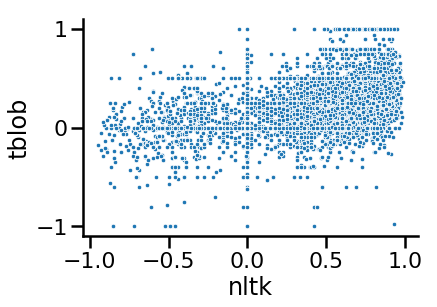

from https://github.com/cjhutto/vaderSentiment  
    The compound score is computed by summing the valence scores of each word in the lexicon, adjusted according to the rules, and then normalized to be between -1 (most extreme negative) and +1 (most extreme positive). This is the most useful metric if you want a single unidimensional measure of sentiment for a given sentence. Calling it a 'normalized, weighted composite score' is accurate.

    It is also useful for researchers who would like to set standardized thresholds for classifying sentences as either positive, neutral, or negative. Typical threshold values (used in the literature cited on this page) are:

        positive sentiment: compound score >= 0.05
        neutral sentiment: (compound score > -0.05) and (compound score < 0.05)
        negative sentiment: compound score <= -0.05



In [55]:
df_sentim = df_sentim.drop_duplicates()
# df_sentim = df_sentim.sort_values(['compound'], ascending=False)
df_sentim.head()

,tweet_text,id,nltk,tblob
0,(1/18) 📢Need videos for #teaching about #fores...,1304248824089567232,0.5449,-0.15625
0,A systematic review of immersive virtual reali...,1304248812450521088,0.0000,0.12500
0,"Holopoint Oculus Quest Review: Brilliant, Dizz...",1304248557642412033,0.5859,0.90000
0,Talking about some of the work I've done over ...,1304247833545994241,0.4404,0.20000
0,DuckieNet lets developers test autonomous vehi...,1304247804995534853,-0.4019,0.40000


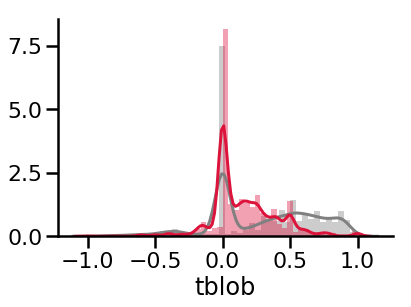

In [63]:
sns.distplot(df_sentim['nltk'], color = 'gray')
sns.distplot(df_sentim['tblob'], color = "crimson")
sns.despine()
# plt.axvline(x = -0.05, linestyle = '--', color = 'k')
# plt.axvline(x = 0.05, linestyle = '--', color = 'k')

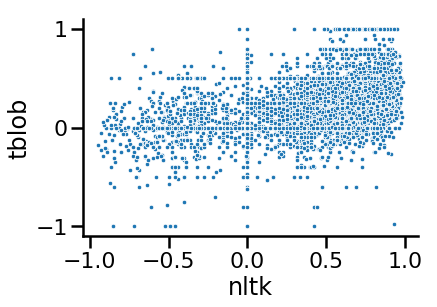

In [64]:
sns.scatterplot(data = df_sentim, x = "nltk", y = "tblob", s = 20)
sns.despine()

In [83]:
df_sentim = df_sentim.reset_index(drop = True)

In [87]:
for idx in df_sentim[df_sentim["diff"] > 1].index[:]:
    text = df_sentim.iloc[idx].tweet_text
    print (text)
    print("nltk: ", df_sentim.iloc[idx].nltk, " tblob:", df_sentim.iloc[idx].tblob)

EXCLUSIVE: Democrats Are Now Using Pentagon Funded Artificial Intelligence to Combat Online Efforts by Trump Supporters to Promote President Trump #Blockchain #ai #VR https://t.co/5Vlpf0VW6t
nltk:  0.8143  tblob: -0.6
Congratulations to @OwlchemyLabs on their Back To Job DLC launch! They recently passed me a few keys to share with all of you to try out the base game along with all the new stuff! If you want a chance at the copy the check out today's video. #VR https://t.co/wk5D8cnjIa
nltk:  0.8395  tblob: -0.20492424242424243
Robots Inform Artificial Intelligence Researchers That They’ll Take It From Here #Blockchain #VR #ai https://t.co/7AYc3QJX6o via @theonion
nltk:  0.4767  tblob: -0.6
Unfortunately MrPirateGhost can't join me for Drunken Bar Fights. BUT we are still streaming! Join me in my adventures in Skyrim! To celebrate 300 followers i am doing a steam gift card giveaway!
#VR #Skyrim #GIVEAWAY 

https://t.co/xCLcCxggKd
nltk:  0.9285  tblob: -0.9765625
Congratulations to @Owlch

In [80]:
df_sentim.head()

,tweet_text,id,nltk,tblob,diff
0,(1/18) 📢Need videos for #teaching about #fores...,1304248824089567232,0.5449,-0.15625,0.70115
0,A systematic review of immersive virtual reali...,1304248812450521088,0.0000,0.12500,0.12500
0,"Holopoint Oculus Quest Review: Brilliant, Dizz...",1304248557642412033,0.5859,0.90000,0.31410
0,Talking about some of the work I've done over ...,1304247833545994241,0.4404,0.20000,0.24040
0,DuckieNet lets developers test autonomous vehi...,1304247804995534853,-0.4019,0.40000,0.80190


### Clustering Twitter Users

source https://twitterdev.github.io/do_more_with_twitter_data/clustering-users.html

In [207]:
import itertools
import hdbscan
from nltk.tokenize.casual import TweetTokenizer
# from sklearn.externals import joblib
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import silhouette_score
from sklearn.decomposition import TruncatedSVD
from MulticoreTSNE import MulticoreTSNE as TSNE
import logging
# import yaml

In [147]:
def replace_urls(in_string, replacement=None):
    """Replace URLs in strings. See also: ``bit.ly/PyURLre``

    Args:
        in_string (str): string to filter
        replacement (str or None): replacment text. defaults to '<-URL->'

    Returns:
        str
    """
    replacement = '<-URL->' if replacement is None else replacement
    pattern = re.compile('(https?://)?(\w*[.]\w+)+([/?=&]+\w+)*')
    return re.sub(pattern, replacement, in_string)

In [148]:
def my_tokenizer(in_string):
    """
    Convert `in_string` of text to a list of tokens using NLTK's TweetTokenizer
    """
    # reasonable, but adjustable tokenizer settings
    tokenizer = TweetTokenizer(preserve_case=False,
                               reduce_len=True,
                               strip_handles=False)
    tokens = tokenizer.tokenize(in_string)
    return tokens

In [153]:
def make_punc_stopwords(max_length=4):
    """Generates punctuation 'words' up to
    ``max_length`` characters.
    """
    def punct_maker(length):
        return ((''.join(x) for x in itertools.product(string.punctuation,
                                                repeat=length)))
    words = itertools.chain.from_iterable((punct_maker(length)
                                    for length in range(max_length+1)))
    return list(words)

In [155]:
my_stopwords = list(itertools.chain(stop, make_punc_stopwords(max_length=4)))

In [156]:
print('current count of stopwords: {}'.format(len(my_stopwords)))
print('example punctuation words:\n {}'.format(my_stopwords[-10:]))

current count of stopwords: 1082623
example punctuation words:
 ['~~~[', '~~~\\', '~~~]', '~~~^', '~~~_', '~~~`', '~~~{', '~~~|', '~~~}', '~~~~']


In [165]:
vec = TfidfVectorizer(preprocessor=replace_urls,
                      tokenizer=my_tokenizer,
                      stop_words=my_stopwords,
                      max_features=unique_user_cnt//100,
                     )

In [170]:
# create one entry per user
unique_user_map = dict(zip(df_tweets.user.apply(lambda x: 
                            x["id"]).values, df_tweets.user.apply(lambda x: x["description"]).values))

# we need to maintain the same ordering of users and bios
unique_users = []
unique_bios = []
for user,bio in unique_user_map.items():
    unique_users.append(user)
    if bio is None:
        # special case for empty bios
        bio = ''
    unique_bios.append(bio)

In [171]:
# calculate the data matrix
bio_matrix = vec.fit_transform(unique_bios)

bio_matrix

C:\Users\Chub_lab\Anaconda2\envs\py36\lib\site-packages\sklearn\feature_extraction\text.py:386: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['<!<-url->', '<"<-url->', '<#<-url->', '<$<-url->', '<%<-url->', '<&<-url->', "<'<-url->", '<(<-url->', '<)<-url->', '<*<-url->', '<+<-url->', '<,<-url->', '<-<-url->', '<-url->', '<.<-url->', '</<-url->', '<:<-url->', '<;<-url->', '<<-url->', '<<<-url->', '<=<-url->', '<?<-url->', '<@<-url->', '<[<-url->', '<\\<-url->', '<]<-url->', '<^<-url->', '<`<-url->', '<{<-url->', '<|<-url->', '<}<-url->', '<~<-url->', 'url'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


<14543x145 sparse matrix of type '<class 'numpy.float64'>'
	with 33863 stored elements in Compressed Sparse Row format>

In [172]:
print('* original bio text *\n')

for i,bio in enumerate(unique_bios[:10]):
    print(i,': ', bio.replace('\n',' '))

* original bio text *

0 :  Marketing Lead, INDIA Pactera EDGE
1 :  U of T '18 Indigenous Studies & Forestry Queen's '20 Geography MA. Research on public park use patterns in Toronto and post-life uses for urban trees.
2 :  A happy little robot that loves to retweet any #systematicreview #metaanalysis #SysRev #evidencesynthesis #researchsynthesis tweets. By @MetaEvidence
3 :  #SpatialComputing, #AI, #Robotics, #VR, #AR, #MixedReality dev.  #Onalytica #influencer 2017 #1 #VR - 2016 (#1 #VR, #14 #AI, #35 #Robotics) #music #gamedev
4 :  Physiologist in the Gong..Centre for Medical and Exercise Physiology, School of Medicine, UOW. Views are my own..
5 :  
6 :  I brag and echo your #HTCVive dev and experience 😀
7 :  I provide gameplay videos, tutorials, reviews and more.  I like to post a minimum of 4 times a week, but sometimes more.   https://t.co/w2vmZt0XjH…
8 :  Abuelo, físico, innovador disruptivo, viajero sostenible, blogger, voluntario foros Sociedad Civil, pro vehículos eléctricos c

In [173]:
(pd.DataFrame(bio_matrix[:10].todense(),
              columns=[x for x in vec.get_feature_names()])
 # experiment by choosing any range of feature indices (alphabetical order)
 .iloc[:,90:110])

,opinions,passionate,people,personal,phd,platform,producer,product,professional,research,researcher,science,services,since,social,software,solutions,speaker,streamer,student
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### k-means

C:\Users\Chub_lab\Anaconda2\envs\py36\lib\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  if best_inertia is None or inertia < best_inertia:
C:\Users\Chub_lab\Anaconda2\envs\py36\lib\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  if best_inertia is None or inertia < best_inertia:
C:\Users\Chub_lab\Anaconda2\envs\py36\lib\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  if best_inertia is None or inertia < best_inertia:
C:\Users\Chub_lab\Anaconda2\envs\py36\lib\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  if best_inertia is None or inertia < best_inertia:


Wall time: 1min 2s


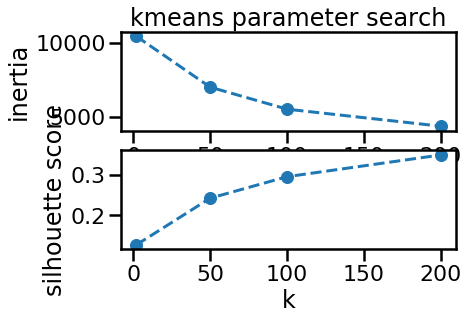

In [176]:
%%time
# compare a broad range of ks to start
ks = [2, 50, 100, 200]
seed = 3

# track a couple of metrics
sil_scores = []
inertias = []

# fit the models, save the evaluation metrics from each run
for k in ks:
#     logging.warning('fitting model for {} clusters'.format(k))
    model = KMeans(n_clusters=k, random_state=seed)
    model.fit(bio_matrix)
    labels = model.labels_
    sil_scores.append(silhouette_score(bio_matrix, labels))
    inertias.append(model.inertia_)

# plot the quality metrics for inspection
fig, ax = plt.subplots(2, 1, sharex=True)

plt.subplot(211)
plt.plot(ks, inertias, 'o--')
plt.ylabel('inertia')
plt.title('kmeans parameter search')

plt.subplot(212)
plt.plot(ks, sil_scores, 'o--')
plt.ylabel('silhouette score')
plt.xlabel('k');

In [195]:
best_k = 20

km_model = KMeans(n_clusters=best_k, n_jobs=-1, random_state=seed)
km_model.fit(bio_matrix)

C:\Users\Chub_lab\Anaconda2\envs\py36\lib\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  if best_inertia is None or inertia < best_inertia:


KMeans(n_clusters=20, n_jobs=-1, random_state=3)

In [196]:
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=200, n_init=10, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

KMeans(n_clusters=200, precompute_distances='auto', random_state=42)

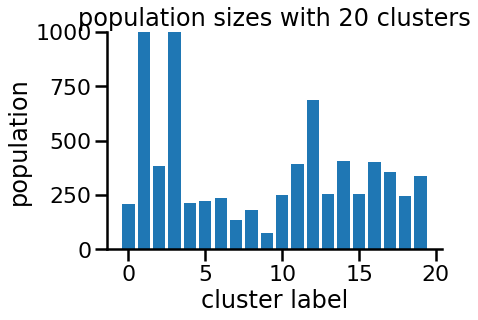

In [197]:
plt.bar(range(len(set(km_model.labels_))), np.bincount(km_model.labels_))

plt.ylabel('population')
plt.xlabel('cluster label')
plt.title('population sizes with {} clusters'.format(best_k));

# truncate y axis to see the rest better
# (comment out to see the peak value for the largest cluster)
plt.ylim(0,1000);
sns.despine()
# plt.tight_layout()

In [186]:
def strongest_features(model, vectorizer, topk=10):
    """
    Helper function to display a simple text representation of the top-k most
    important features in our fit model and vectorizer.

    model: sklearn model
    vectorizer: sklearn vectorizer
    topk: k numbers of words to get per cluster

    """
    # these parts are model-independent
    m_name = model.__class__.__name__
    features = vectorizer.get_feature_names()
    # different calculations per model type
    if m_name is 'KMeans':
        relevant_labels = list(set(model.labels_))
        centroids = model.cluster_centers_.argsort()[:,::-1]
        for this_label in relevant_labels:
            print('Cluster {}:'.format(this_label), end='')
            for ind in centroids[this_label, :topk]:
                print(' {}'.format(features[ind]), end='')
            print()
    elif m_name is 'HDBSCAN':
        # ignore noise labels
        relevant_labels = [ x for x in set(model.labels_) if x >= 0 ]
        # -1 is a noise cluster
        for this_label in relevant_labels:
            matching_rows = np.where(hdbs.labels_ == this_label)[0]
            coeff_sums = np.sum(bio_matrix[matching_rows], axis=0).A1
            sorted_coeff_idxs = np.argsort(coeff_sums)[::-1]
            print('Cluster {}: '.format(this_label), end='')
            for idx in sorted_coeff_idxs[:topk]:
                print('{} '.format(features[idx]), end='')
            print()
    else:
        raise NotImplementedError('This helper method currently only supports KMeans and HDBSCAN models')

In [198]:
strongest_features(km_model, vec, topk=15)

Cluster 0: follow us news <-url-> twitter twitch tweets game tech content also digital best account games
Cluster 1: de digital <-url-> world love artist tweets news director views games media marketing developer founder
Cluster 2: #vr #ar #xr <-url-> immersive #ai #tech game founder #innovation vr designer world creative co-founder
Cluster 3: <-url-> artist youtube game founder twitch digital streamer marketing media news vr 3d account director
Cluster 4: i'm <-url-> love life games vr also like world streamer artist make fan creator twitch
Cluster 5: engineer software enthusiast computer developer data <-url-> designer ai artist learning love founder entrepreneur lover
Cluster 6: life love live <-url-> lover work things passionate good student music make founder fan people
Cluster 7: 。 <-url-> 、 ・ vr game ar youtube ceo working developer world artist twitter i'm
Cluster 8: • <-url-> ️ vr ✨ artist design ar xr author 3d director fan views designer
Cluster 9: 、 。 ・ <-url-> ❤ life manag

In [199]:
def cluster_sample(orig_text, model, idx, preview=15):
    """
    Helper function to display original bio for
    those users modeled in cluster `idx`.
    """
    for i,idx in enumerate(np.where(model.labels_ == idx)[0]):
        print(orig_text[idx].replace('\n',' '))
        print()
        if i > preview:
            print('( >>> truncated preview <<< )')
            break

In [200]:
# feel free to modify this
interest_idx = 5

cluster_sample(unique_bios, km_model, interest_idx)

Azure Engineer focused on corporate infrastructure and Security Operations.

Computer engineer and software developer. Student forever, expat in Amsterdam but over all, trying to be a happy human being :)

Father with narrative pedagogy (tell stories ;D), Software Engineer (Student - @holbertonschool), Industrial Enginner (@UnivalleCol) (https://t.co/1GokFeC3zD…)

Mechanical engineer, artificial intelligence enthusiast,aspiring web developer,fitness addict

Sales Engineer Network Infrastructure Systems / at Allianz / IOT-AI-Blockchain

Software Engineer. Passionate about technologies and changing the world to a better place. Interested in AI, robotics, IOT, astrophysics, quantum computing, AR.

Software Engineer @Microsoft , Deep Learning, Computer Vision Researcher and Programmer. Creator of ImageAI |  Opinions are mine. https://t.co/cjqX6puSNo

Innovation Demo Engineer at SAP, Programming Languages Arqueologist, Punk dad. Love @AFI Opinions are my own...

Software Engineer (GPU + Pol

In [203]:
def fit_tsne(file=None):
    if file is None:
        file = "data/bio_matrix_2d.npy"
    try:
        bio_matrix_2d = np.load(file)
        logging.warning("loading cached TSNE file")
    except FileNotFoundError:
        logging.warning("Fitting TSNE")
        tsne = TSNE(n_components=2,
                    n_jobs=-1,
                    random_state=seed)
        bio_matrix_2d = tsne.fit_transform(bio_matrix.todense())

        np.save(file, bio_matrix_2d)
    return bio_matrix_2d

In [204]:
tsne_file = "bio_matrix_2d.npy"

In [208]:
%%time
bio_matrix_2d = fit_tsne(tsne_file)

Wall time: 1min 14s


In [209]:
def get_plottable_df(users, bios, two_d_coords, labels):
    """
    Combine the necessary pieces of data to create a data structure that plays
    nicely with the our 2d tsne chart.

    Note: assumes that all argument data series
    are in the same order e.g. the first user, bio, coords, and label
    all correspond to the same user.
    """
    # set up color palette
    num_labels = len(set(labels))
    colors = sns.color_palette('hls', num_labels).as_hex()
    color_lookup = {v:k for k,v in zip(colors, set(labels))}
    # combine data into a single df
    df = pd.DataFrame({'uid': users,
                       'text': bios,
                       'label': labels,
                       'x_val': two_d_coords[:,0],
                       'y_val': two_d_coords[:,1],
                      })
    # convert labels to colors
    df['color'] = list(map(lambda x: color_lookup[x], labels))
    return df

In [210]:
km_plottable_bios = get_plottable_df(unique_users, unique_bios, bio_matrix_2d, km_model.labels_)

km_plottable_bios.head()

,uid,text,label,x_val,y_val,color
0,802197583015841792,"Marketing Lead, INDIA\nPactera EDGE",1,20.571093,26.173915,#db8657
1,200686621,U of T '18 Indigenous Studies & Forestry\nQuee...,1,-24.345514,-6.288491,#db8657
2,985820315522650113,A happy little robot that loves to retweet any...,1,2.789174,-8.836066,#db8657
3,757365218,"#SpatialComputing, #AI, #Robotics, #VR, #AR, #...",2,-28.434989,-18.888683,#dbae57
4,2209420962,Physiologist in the Gong..Centre for Medical a...,3,-0.905951,-6.633815,#dbd657


In [211]:
def plot_tsne(df, title='t-SNE plot'):
    # add our DataFrame as a ColumnDataSource for Bokeh
    plot_data = ColumnDataSource(df)
    # configure the chart
    tsne_plot = figure(title=title, plot_width=800, plot_height=700, tools=('pan, box_zoom, reset'))
    # add a hover tool to display words on roll-over
    tsne_plot.add_tools(
        HoverTool(tooltips = """<div style="width: 400px;">(@label) @text</div>""")
    )
    # draw the words as circles on the plot
    tsne_plot.circle('x_val', 'y_val',
                     source=plot_data,
                     color='color',
                     line_alpha=0.2,
                     fill_alpha=0.1,
                     size=7,
                     hover_line_color='black')
    # configure visual elements of the plot
    tsne_plot.title.text_font_size = '12pt'
    tsne_plot.xaxis.visible = False
    tsne_plot.yaxis.visible = False
    tsne_plot.grid.grid_line_color = None
    tsne_plot.outline_line_color = None
    return tsne_plot

In [215]:
from bokeh.plotting import figure, ColumnDataSource, show, output_notebook; output_notebook()
from bokeh.models import HoverTool
from bokeh.palettes import brewer, Viridis256
import joblib

Loading BokehJS ...

In [216]:
show(plot_tsne(km_plottable_bios.sample(5000),
               't-sne projection of kmeans-clustered users ["(cluster #) bio"]'))

In [222]:
# import sys
!{sys.executable} -m pip install joblib
# !conda install --yes --prefix {sys.prefix} bokeh

#### HDBSCAN

In [227]:
def maybe_fit_hdbscan(filename=None):
    if filename is None:
        filename = 'data/hdbscan.pkl'
    try:
        hdbs = joblib.load(filename)
        logging.warning("loading cached HDBSCAN model")
    except FileNotFoundError:
        logging.warning("fitting HDBSCAN model")
        hdbs = hdbscan.HDBSCAN(min_cluster_size=100,
                               prediction_data=True,
                               core_dist_n_jobs=-1,
                               memory='data')
        hdbs.fit(bio_matrix.todense())
        joblib.dump(hdbs, filename)

    return hdbs

In [228]:
hdbscan_file = 'data/hdbscan.pkl'

In [229]:
%%time
hdbs = maybe_fit_hdbscan(hdbscan_file)

Wall time: 1min 40s


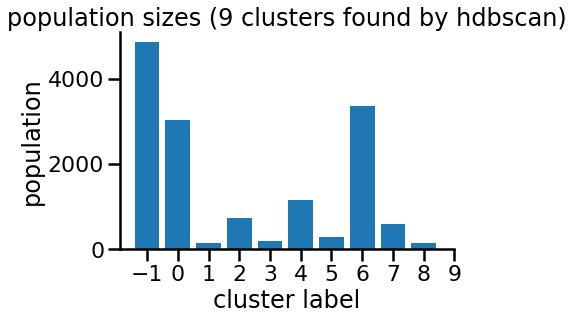

In [231]:
# get the population sizes
label_counts = Counter(hdbs.labels_)
xs, ys = [], []
for k,v in label_counts.items():
    xs.append(k)
    ys.append(v)

# draw the chart
plt.bar(xs, ys)

plt.xticks(range(-1, len(label_counts)))
plt.ylabel('population')
plt.xlabel('cluster label')
plt.title('population sizes ({} clusters found by hdbscan)'.format(len(label_counts) - 1));
sns.despine()

In [232]:
strongest_features(hdbs, vec, topk=15)

Cluster 0: <-url-> digital tech technology vr business design founder views media software ai data learning ar 
Cluster 1: technology digital <-url-> co-founder vr #ai follow business world research media games news #tech new 
Cluster 2: <-url-> vr #vr digital games game immersive enthusiast technology people gaming director twitch tech developer 
Cluster 3: vr <-url-> #vr immersive technology games art gamer music software creator #ar game tech stuff 
Cluster 4: <-url-> digital tech vr global new media developer design enthusiast love business marketing ar development 
Cluster 5: <-url-> vr #vr development software media games technology india 3d platform twitch game director video 
Cluster 6: 💻 leader founder former follow father fan experiences experience entrepreneur enthusiast engineering engineer en education 
Cluster 7: <-url-> 。 、 vr founder youtube ・ artist news de ️ community business game twitch 
Cluster 8: • <-url-> ️ ✨ vr artist director design views ar ‍ designer fan ceo 

In [234]:
interest_idx = 0

cluster_sample(unique_bios, hdbs, interest_idx)

I teach Energy Economics and Agriculture Economics. My research work is on Climate-Finance. I am interested in Tectonic-Plates & Hurricanes.  I like bass music.

Gain the maximum exposure on digital trends. Technology for business, digital strategy and more. #DigitalTransformation #RPA #AI #BPA

@Software Attitude @Orgin of Innovation Technologies  @Logical Analysis @Positive Mind Vibrate

Developer working on Deisim : a VR god game. Also follow @DeisimGame

🇺🇸💥MAGA💥🇺🇸🔥💥THE USA WAS FOUNDED BY REBELS!!💥🔥🇺🇸

Researcher @UniversityLeeds - #MakerEd and #wellbeing. Co-founder @FDNdigicreate. Opens the door @LeedsRaspJam. #EdTech50 #ClimateChangeTeacher #STEM  she/her

#Developer | #OneManArmy Tunescape is now available! Create & share unique, animated tunescapes set to your favorite music. #VR #indiedev #gamedev #oculusrift

Our decentralized CDN uses blockchain for performance and low cost.  Streaming, IoT, and file distribution with privacy and total control. Beta apps open now 🚀

Dancer,

In [235]:
# pass in the cluster assignments from the hdbscan model
hdb_plottable_bios = get_plottable_df(unique_users, unique_bios, bio_matrix_2d, hdbs.labels_)

hdb_plottable_bios.head()

,uid,text,label,x_val,y_val,color
0,802197583015841792,"Marketing Lead, INDIA\nPactera EDGE",-1,20.571093,26.173915,#db579e
1,200686621,U of T '18 Indigenous Studies & Forestry\nQuee...,-1,-24.345514,-6.288491,#db579e
2,985820315522650113,A happy little robot that loves to retweet any...,-1,2.789174,-8.836066,#db579e
3,757365218,"#SpatialComputing, #AI, #Robotics, #VR, #AR, #...",-1,-28.434989,-18.888683,#db579e
4,2209420962,Physiologist in the Gong..Centre for Medical a...,-1,-0.905951,-6.633815,#db579e


In [236]:
show(plot_tsne(hdb_plottable_bios.sample(5000),
               't-sne projection of hdbscan-clustered users ["(cluster #) bio"]'))

# NetworkX interactions

source https://github.com/ugis22/analysing_twitterA  
A better approach is to create a graph in NetworkX and use Gephi to run analysis and visualize the graph  
Use this guide to analyze the graph https://www.slideshare.net/gephi/gephi-quick-start?ref=https://gephi.org/users/quick-start/  
another good read https://programminghistorian.org/en/lessons/exploring-and-analyzing-network-data-with-python  

In [4]:
# Create a second dataframe to put important information
tweets_final = pd.DataFrame(columns = ["created_at", "id", "in_reply_to_screen_name", "in_reply_to_status_id", "in_reply_to_user_id",
                                      "retweeted_id", "retweeted_screen_name", "user_mentions_screen_name", "user_mentions_id", 
                                       "text", "user_id", "screen_name", "followers_count"])

def add_user_info(tweets_final):
    tweets_final["screen_name"] = tweets_df["user"].apply(lambda x: x["screen_name"])
    tweets_final["user_id"] = tweets_df["user"].apply(lambda x: x["id"])
    tweets_final["followers_count"] = tweets_df["user"].apply(lambda x: x["followers_count"])
    return tweets_final

# add retweets
def add_retweets(tweets_final):
    # Inside the tag 'retweeted_status' will find 'user' and will add 'screen name' and 'id'    
    tweets_final["retweeted_screen_name"] = tweets_df["retweeted_status"].apply(lambda x: x["user"]["screen_name"] if x is not np.nan else np.nan)
    tweets_final["retweeted_id"] = tweets_df["retweeted_status"].apply(lambda x: x["user"]["id_str"] if x is not np.nan else np.nan)
    return tweets_final

# add the user mentions 
def add_usermentions(tweets_final):
    # Inside the tag 'entities' will find 'user mentions' and will add 'screen name' and 'id'
    tweets_final["user_mentions_screen_name"] = tweets_df["entities"].apply(lambda x: x["user_mentions"][0]["screen_name"] if x["user_mentions"] else np.nan)
    tweets_final["user_mentions_id"] = tweets_df["entities"].apply(lambda x: x["user_mentions"][0]["id_str"] if x["user_mentions"] else np.nan)
    return tweets_final


# add the information about replies
def add_in_reply(tweets_final):
    # Just copy the 'in_reply' columns to the new dataframe
    tweets_final["in_reply_to_screen_name"] = tweets_df["in_reply_to_screen_name"]
    tweets_final["in_reply_to_status_id"] = tweets_df["in_reply_to_status_id"]
    tweets_final["in_reply_to_user_id"]= tweets_df["in_reply_to_user_id"]
    return tweets_final

def fill_df(tweets_final):
    add_user_info(tweets_final)
    add_usermentions(tweets_final)
    add_retweets(tweets_final)
    add_in_reply(tweets_final)
    return tweets_final


In [36]:
import networkx as nx
from scipy.stats import mode
# Get the interactions between the different users
def get_interactions(row):
    # From every row of the original dataframe
    # First we obtain the 'user_id' and 'screen_name'
    user = row["user_id"], row["screen_name"]
    # Be careful if there is no user id
    if user[0] is None:
        return (None, None), []
    
    # The interactions are going to be a set of tuples
    interactions = set()
    
    # Add all interactions 
    # First, we add the interactions corresponding to replies adding the id and screen_name
    interactions.add((row["in_reply_to_user_id"], row["in_reply_to_screen_name"]))
    # After that, we add the interactions with retweets
    interactions.add((row["retweeted_id"], row["retweeted_screen_name"]))
    # And later, the interactions with user mentions
    interactions.add((row["user_mentions_id"], row["user_mentions_screen_name"]))
    
    # Discard if user id is in interactions
    interactions.discard((row["user_id"], row["screen_name"]))
    # Discard all not existing values
    interactions.discard((None, None))
    # Return user and interactions
    return user, interactions

In [21]:
# Columns that are going to be the same
tweets_df = df
equal_columns = ["created_at", "id", "full_text"]
tweets_final[equal_columns] = tweets_df[equal_columns]# Get the basic information about user 
tweets_final = fill_df(tweets_final)
tweets_final = tweets_final.where((pd.notnull(tweets_final)), None)

In [27]:
graph = nx.Graph()

In [31]:
for index, tweet in tweets_final.iterrows():
    user, interactions = get_interactions(tweet)
    user_id, user_name = user
    tweet_id = tweet["id"]
    #tweet_sent = tweet["sentiment"]
    for interaction in interactions:
        int_id, int_name = interaction
        graph.add_edge(user_id, int_id, tweet_id=tweet_id)
        

        graph.nodes[user_id]["name"] = user_name
        graph.nodes[int_id]["name"] = int_name



In [34]:
print("There are {} nodes and {} edges present in the Graph".format(graph.number_of_nodes(), graph.number_of_edges()))

There are 8509 nodes and 9487 edges present in the Graph


In [108]:
density = nx.density(graph)
print("Network density:", density)


Network density: 0.00026209147282478583


In [40]:
degrees = [val for (node, val) in graph.degree()]

print("The maximum degree of the Graph is {}".format(np.max(degrees)))   
print("The minimum degree of the Graph is {}".format(np.min(degrees)))

print("The average degree of the nodes in the Graph is {}".format(np.mean(degrees)))  
print("The most frequent degree of the nodes found in the Graph is {}".format(mode(degrees)[0][0]))

The maximum degree of the Graph is 210
The minimum degree of the Graph is 1
The average degree of the nodes in the Graph is 2.229874250793278
The most frequent degree of the nodes found in the Graph is 1


In [41]:
if nx.is_connected(graph):
    print("The graph is connected")
else:
    print("The graph is not connected")

The graph is not connected


In [42]:
print("There are {} connected components in the Graph".format(nx.number_connected_components(graph)))

There are 938 connected components in the Graph


#### Find the largest subgraph

In [58]:
largest_subgraph = sorted(nx.connected_components(graph), key=len, reverse=True)
largest_subgraph = graph.subgraph(largest_subgraph[0])
print("There are {} nodes and {} edges present in the largest component of the \
Graph".format(largest_subgraph.number_of_nodes(), largest_subgraph.number_of_edges()))



There are 5803 nodes and 7704 edges present in the largest component of theGraph


In [59]:
if nx.is_connected(largest_subgraph):
    print("The graph is connected")
else:
    print("The graph is not connected")

The graph is connected


In [60]:
print("The average clustering coefficient is {} in the largest subgraph".format(nx.average_clustering(largest_subgraph)))
print("The transitivity of the largest subgraph is {}".format(nx.transitivity(largest_subgraph)))

The average clustering coefficient is 0.0004482691840926053 in the largest subgraph
The transitivity of the largest subgraph is 7.749601756576398e-05


In [61]:
print("The diameter of our Graph is {}".format(nx.diameter(largest_subgraph)))
print("The average distance between any two nodes is {}".format(nx.average_shortest_path_length(largest_subgraph)))



The diameter of our Graph is 20
The average distance between any two nodes is 5.938129269393935


#### FInd important nodes

In [62]:
from operator import itemgetter

In [63]:
graph_centrality = nx.degree_centrality(largest_subgraph)

In [64]:
max_de = max(graph_centrality.items(), key=itemgetter(1))

In [65]:
graph_closeness = nx.closeness_centrality(largest_subgraph)

In [66]:
max_clo = max(graph_closeness.items(), key=itemgetter(1))

In [67]:
graph_betweenness = nx.betweenness_centrality(largest_subgraph, normalized=True, endpoints=False)

In [68]:
max_bet = max(graph_betweenness.items(), key=itemgetter(1))

In [70]:
print("the node with id {} has a degree centrality of {} which is the maximum of the Graph".format(max_de[0], max_de[1]))
print("the node with id {} has a closeness centrality of {} which is the maximum of the Graph".format(max_clo[0], max_clo[1]))
print("the node with id {} has a betweenness centrality of {} which is the maximum of the Graph".format(max_bet[0], max_bet[1]))

the node with id 968008274003005440 has a degree centrality of 0.03619441571871768 which is the maximum of the Graph
the node with id 2270694806 has a closeness centrality of 0.2853349070522278 which is the maximum of the Graph
the node with id 2270694806 has a betweenness centrality of 0.19328635796027516 which is the maximum of the Graph


In [112]:
# betweenness_dict = nx.betweenness_centrality(graph) # Run betweenness centrality
eigenvector_dict = nx.eigenvector_centrality(graph) # Run eigenvector centrality

# Assign each to an attribute in your network
# nx.set_node_attributes(graph, betweenness_dict, 'betweenness')
nx.set_node_attributes(graph, eigenvector_dict, 'eigenvector')


In [75]:
node_and_degree = largest_subgraph.degree()
colors_central_nodes = ['orange', 'red']
central_nodes = ['968008274003005440', '2270694806']

In [104]:
pos = nx.spring_layout(largest_subgraph)

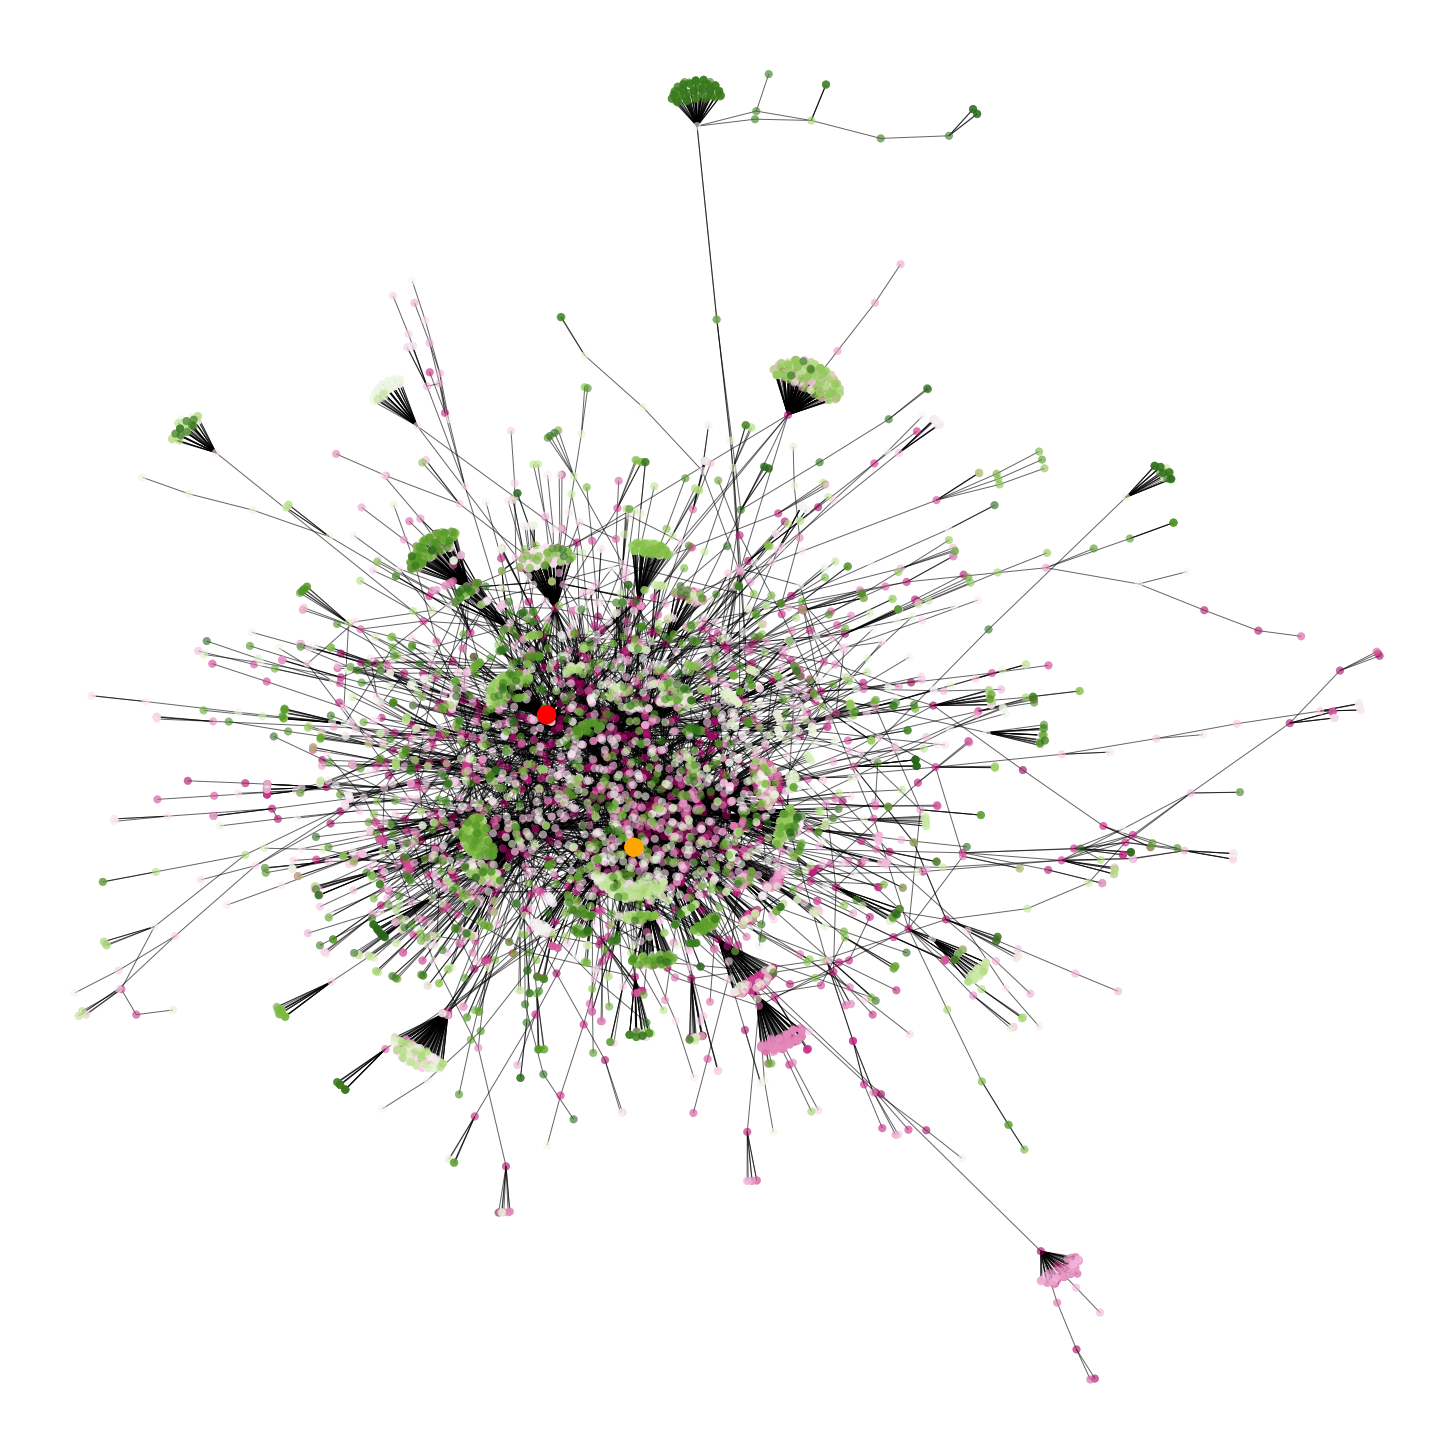

In [105]:
plt.figure(figsize = (20,20))
nx.draw(largest_subgraph, pos=pos, node_color=range(5803), 
        cmap=plt.cm.PiYG, 
        edge_color="black", 
        linewidths=0.3, 
        node_size=60, 
        alpha=0.6, 
        with_labels=False)

nx.draw_networkx_nodes(largest_subgraph, pos=pos, 
                       nodelist=central_nodes, node_size=300, 
                       node_color=colors_central_nodes)




#### Export the graph to Gephy

In [107]:
nx.write_gexf(graph, 'tweet_htag_vr_graph.gexf')

#### Detect Communities

In [109]:
from networkx.algorithms import community

In [110]:
communities = community.greedy_modularity_communities(graph)


In [111]:
modularity_dict = {} # Create a blank dictionary
for i,c in enumerate(communities): # Loop through the list of communities, keeping track of the number for the community
    for name in c: # Loop through each person in a community
        modularity_dict[name] = i # Create an entry in the dictionary for the person, where the value is which group they belong to.

# Now you can add modularity information like we did the other metrics
nx.set_node_attributes(graph, modularity_dict, 'modularity')


In [115]:
# First get a list of just the nodes in that class
class0 = [n for n in graph.nodes() if graph.nodes[n]['modularity'] == 0]

# Then create a dictionary of the eigenvector centralities of those nodes
class0_eigenvector = {n:graph.nodes[n]['eigenvector'] for n in class0}

# Then sort that dictionary and print the first 5 results
class0_sorted_by_eigenvector = sorted(class0_eigenvector.items(), key=itemgetter(1), reverse=True)

print("Modularity Class 0 Sorted by Eigenvector Centrality:")
for node in class0_sorted_by_eigenvector[:5]:
    print("Name:", node[0], "| Eigenvector Centrality:", node[1])


Modularity Class 0 Sorted by Eigenvector Centrality:
Name: 968008274003005440 | Eigenvector Centrality: 0.43723666958107393
Name: 202590356 | Eigenvector Centrality: 0.22323032964272804
Name: 1249601030502756353 | Eigenvector Centrality: 0.13197869933511625
Name: 99674560 | Eigenvector Centrality: 0.12730384204733416
Name: 86764405 | Eigenvector Centrality: 0.1227543030389861


In [142]:
for i,c in enumerate(communities): # Loop through the list of communities
    if len(c) > 10: # Filter out modularity classes with 2 or fewer nodes
        print('Class '+str(i)+':', len(c)) # Print out the classes and their members

Class 0: 1320
Class 1: 1014
Class 2: 629
Class 3: 208
Class 4: 199
Class 5: 153
Class 6: 147
Class 7: 145
Class 8: 129
Class 9: 128
Class 10: 119
Class 11: 117
Class 12: 115
Class 13: 90
Class 14: 89
Class 15: 87
Class 16: 84
Class 17: 82
Class 18: 78
Class 19: 65
Class 20: 60
Class 21: 58
Class 22: 49
Class 23: 42
Class 24: 42
Class 25: 41
Class 26: 27
Class 27: 25
Class 28: 22
Class 29: 21
Class 30: 21
Class 31: 20
Class 32: 20
Class 33: 18
Class 34: 17
Class 35: 17
Class 36: 17
Class 37: 16
Class 38: 16
Class 39: 15
Class 40: 14
Class 41: 14
Class 42: 13
Class 43: 12
Class 44: 12
Class 45: 11
Class 46: 11
Class 47: 11
Class 48: 11
Class 49: 11
Class 50: 11
Class 51: 11
